# To Infinity

> Insanity Check | 991 points | 6 solves
> 
> Author: JuliaPoo and Neobeo
> 
> To infinity and beyond
> 
> http://infinity.chall.seetf.sg:1337
> 
> Attachment: [misc_to_infinity.py](attachments/misc_to_infinity.py)  
> MD5: d33d16938771d5a58ea4bbea57d6524d
> 
> <details><summary>Hint (click me):</summary> Continued fractions might come in handy here.</details>

Using modulo $p=2^{255} - 19$, start from a pi-ish large number `x` and try to reach (effectively) 0 by using up to 1000 operations of `x+1`, `x-1` and `1/x`.

The hint _practically_ gave it away. If you can express `x` as a fraction with reasonably small numerator and denominator, the fraction can be converted into a continued fraction where each integer part is an add/subtract operation and each extra layer of fraction is a divide operation.

A small fraction can be generated by modelling this as a closest vector problem.

$$
\begin{align}
\text{start} &= \frac{a}{b} \mod p \\
\text{start} \cdot b &= a \mod p  \\
\text{start} \cdot b - a &= 0 \mod p 
\end{align}
$$

In [1]:
# parameters
p = 2^255 - 19
start = 314159265358979323846264338327950288419716939937510582097494459230781640628
F = Zmod(p)

large = 2 ^ 99

def babai(A, w):
  A = A.LLL(delta=0.75)
  G = A.gram_schmidt()[0]
  t = w
  for i in reversed(range(A.nrows())):
      c = ((t * G[i]) / (G[i] * G[i])).round()
      t -= A[i] * c
  return w - t

# CVP matrix
mat = matrix([
  [1, 0, 0, -1 * large],
  [0, 1, 0, start * large],
  [0, 0, 1, p * large],
])

goal = int(p ^ 0.5)
vec = vector([goal, goal, 0, 0])
soln = babai(mat, vec)

print(soln)

# sanity check
print(F(soln[0]) / soln[1], F(soln[0]) / soln[1] == start)

(332003626804003863249629302790358290778, 67632026724543317392170767363140964499, -366989281745752686506063927598140106, 0)
314159265358979323846264338327950288419716939937510582097494459230781640628 True


In [2]:
# generate the continued fraction

cf = list((soln[0] / soln[1]).continued_fraction())
print(cf)

[4, 1, 9, 1, 67, 1, 3, 89, 3, 18, 1, 12, 1, 3, 1, 8, 1, 2, 2, 25, 1, 1, 1, 3, 6, 1, 1, 5, 13, 10, 6, 1, 6, 10, 4, 1, 1, 1, 1, 1, 17, 2, 46, 1, 2, 3, 1, 43, 1, 2, 15, 47, 3, 5, 1, 1, 1, 59, 3, 1, 3, 2, 1, 1, 4, 2]


In [3]:
# recover the instructions

cur_g = F(start)
moves = []
for i in cf:
  cur_g = cur_g - i
  for _ in range(i):
    moves.append("-")
  if cur_g != 0:
    cur_g = 1 / cur_g
    moves.append("/")

moves.append("/")
moves = "".join(moves)
print(moves)

# sanity check
print(cur_g, cur_g == 0)

----/-/---------/-/-------------------------------------------------------------------/-/---/-----------------------------------------------------------------------------------------/---/------------------/-/------------/-/---/-/--------/-/--/--/-------------------------/-/-/-/---/------/-/-/-----/-------------/----------/------/-/------/----------/----/-/-/-/-/-/-----------------/--/----------------------------------------------/-/--/---/-/-------------------------------------------/-/--/---------------/-----------------------------------------------/---/-----/-/-/-/-----------------------------------------------------------/---/-/---/--/-/-/----/--/
0 True


In [4]:
# submit to the webui

import requests

s = requests.Session()
res = s.post("http://infinity.chall.seetf.sg:1337/api/submit", json={
  "player_name": "⁽⁽ฅ₍₍⁽⁽ฅ•ω•ฅ₎₎⁾⁾ฅ₎₎わわわわわわわ",
  "moves": moves
})
res.text

'{"success":true,"detail":"659 moves! You\'re in the 1 place! Here\'s the flag! SEE{Sayonara-Wild-Heart_91629432713d02f}"}'

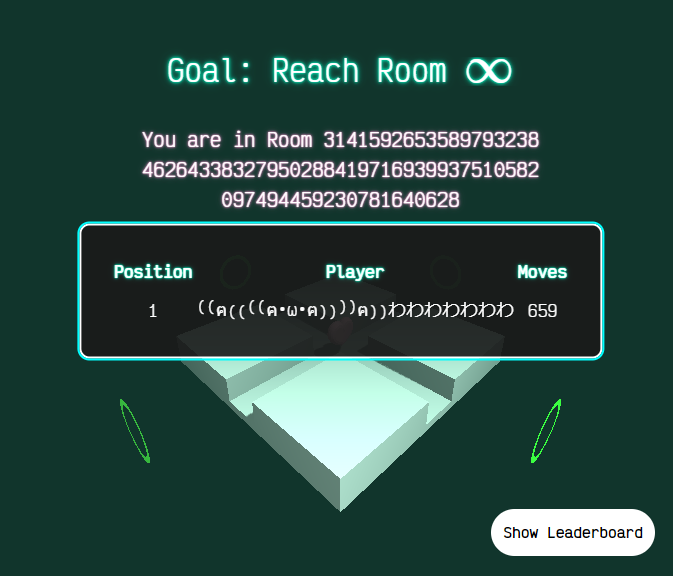